In [1]:
import tarfile
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [2]:
url = 'http://udon.stacken.kth.se/~ninjin/comp0090_assignment_1_data.tar.gz'
ftpstream = urllib.request.urlopen(url)
tar = tarfile.open(fileobj=ftpstream, mode="r|gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x000001C85C5CAE10>>

In [3]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [4]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


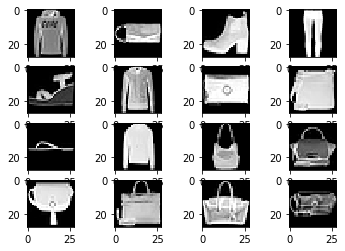

In [5]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

In [6]:
# reshape data to make it easier to work with
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

In [7]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = 0
    return w, b

In [8]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return logistic_func(x) * (1 - logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [9]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100    

In [10]:
#Loss Function

def loss_func(ys, y_predict):
    sum = 0
    n = ys.shape[0]
    for i in range(n):
        sum += (ys[i] - y_predict[i]) ** 2
    return sum / (2*n)

In [11]:
#Loss Function for single points

def loss(y, y_hat):
    return ((y - y_hat) ** 2) / 2

In [12]:
def validation_predictions(devxs, devys, w, b):
    y_predict = []
    
    for i in range(devxs.shape[0]):
        y_hat = f(devxs[i], w, b)
        y_predict.append(y_hat)
        
    return y_predict

In [57]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store predicted y's and loss for each epoch
    y_predict = []
    loss_training = []
    loss_validation = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    loss_old = loss_func(devys, validation_predictions(devxs, devys, w, b))
    row_epoch = 0
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.1
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)
        y_predict = []

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            y_predict.append(y_hat)
            grad_w += trainxs[i] * (y_hat - trainys[i]) * (1 - y_hat) * y_hat 
            grad_b += (y_hat - trainys[i]) * (1 - y_hat) * y_hat 

        grad_w /= trainxs.shape[0]
        grad_b /= trainxs.shape[0]
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        loss_train = loss_func(trainys, y_predict)
        loss_training.append(loss_train)
        print('Training set loss:', loss_train)
        loss_dev = loss_func(devys, validation_predictions(devxs, devys, w, b))
        loss_validation.append(loss_dev)
        print('Validation set loss:', loss_dev)
        
        # check if converged
        if np.abs(loss_dev - loss_old) < 0.000001:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        loss_old = loss_dev
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation, loss_training, loss_validation

In [58]:
epoch, accuracy_training, accuracy_validation, loss_training, loss_validation = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Training set loss: 0.125
Validation set loss: 0.1171552646123714
Epoch 1
Training set accuracy: 66.4
Validation set accuracy: 68.4
Training set loss: 0.11758031575658431
Validation set loss: 0.11166747791745216
Epoch 2
Training set accuracy: 71.98333333333333
Validation set accuracy: 71.89999999999999
Training set loss: 0.11214173444297819
Validation set loss: 0.10685128822965706
Epoch 3
Training set accuracy: 76.40833333333333
Validation set accuracy: 76.2
Training set loss: 0.10732754581142993
Validation set loss: 0.1025725819794579
Epoch 4
Training set accuracy: 78.34166666666667
Validation set accuracy: 78.8
Training set loss: 0.10306007592268612
Validation set loss: 0.09876912731742027
Epoch 5
Training set accuracy: 79.48333333333333
Validation set accuracy: 80.2
Training set loss: 0.09927988984547198
Validation set loss: 0.09538216917298471
Epoch 6
Training set accuracy: 80.15
Validation s

Training set accuracy: 90.675
Validation set accuracy: 92.0
Training set loss: 0.05217141292039094
Validation set loss: 0.05001261861127951
Epoch 53
Training set accuracy: 90.85
Validation set accuracy: 92.0
Training set loss: 0.05180580256160953
Validation set loss: 0.049645398511079866
Epoch 54
Training set accuracy: 91.00833333333334
Validation set accuracy: 92.0
Training set loss: 0.051448170553954876
Validation set loss: 0.04928625843969878
Epoch 55
Training set accuracy: 91.14999999999999
Validation set accuracy: 92.10000000000001
Training set loss: 0.05109824788801586
Validation set loss: 0.04893492771781643
Epoch 56
Training set accuracy: 91.28333333333333
Validation set accuracy: 92.2
Training set loss: 0.050755778769793675
Validation set loss: 0.04859114856865238
Epoch 57
Training set accuracy: 91.38333333333334
Validation set accuracy: 92.4
Training set loss: 0.05042051968024169
Validation set loss: 0.048254675243929006
Epoch 58
Training set accuracy: 91.50833333333334
Valid

Training set accuracy: 94.075
Validation set accuracy: 94.8
Training set loss: 0.03996462321925828
Validation set loss: 0.037806457412838675
Epoch 105
Training set accuracy: 94.08333333333333
Validation set accuracy: 94.8
Training set loss: 0.03981615184470508
Validation set loss: 0.03765885975946415
Epoch 106
Training set accuracy: 94.075
Validation set accuracy: 94.89999999999999
Training set loss: 0.039669709428811414
Validation set loss: 0.037513303571831864
Epoch 107
Training set accuracy: 94.09166666666667
Validation set accuracy: 95.0
Training set loss: 0.0395252536184717
Validation set loss: 0.03736974591963002
Epoch 108
Training set accuracy: 94.1
Validation set accuracy: 95.0
Training set loss: 0.039382743220563954
Validation set loss: 0.037228145055452765
Epoch 109
Training set accuracy: 94.10833333333333
Validation set accuracy: 95.0
Training set loss: 0.039242138163062795
Validation set loss: 0.03708846037490156
Epoch 110
Training set accuracy: 94.125
Validation set accura

Training set accuracy: 94.75
Validation set accuracy: 95.5
Training set loss: 0.034235543214768176
Validation set loss: 0.0321309396271051
Epoch 157
Training set accuracy: 94.75
Validation set accuracy: 95.5
Training set loss: 0.034154460746918594
Validation set loss: 0.03205093675905566
Epoch 158
Training set accuracy: 94.76666666666667
Validation set accuracy: 95.5
Training set loss: 0.03407417098518437
Validation set loss: 0.03197172572967112
Epoch 159
Training set accuracy: 94.76666666666667
Validation set accuracy: 95.5
Training set loss: 0.033994661766640295
Validation set loss: 0.03189329428648644
Epoch 160
Training set accuracy: 94.79166666666666
Validation set accuracy: 95.5
Training set loss: 0.03391592117757663
Validation set loss: 0.03181563042911234
Epoch 161
Training set accuracy: 94.8
Validation set accuracy: 95.5
Training set loss: 0.033837937547178176
Validation set loss: 0.03173872240282058
Epoch 162
Training set accuracy: 94.8
Validation set accuracy: 95.5
Training s

Training set accuracy: 95.05
Validation set accuracy: 95.7
Training set loss: 0.030855768337270967
Validation set loss: 0.028804761468774694
Epoch 209
Training set accuracy: 95.05
Validation set accuracy: 95.7
Training set loss: 0.030803962134613
Validation set loss: 0.028753915716177966
Epoch 210
Training set accuracy: 95.05833333333334
Validation set accuracy: 95.7
Training set loss: 0.030752545305716684
Validation set loss: 0.028703456209464386
Epoch 211
Training set accuracy: 95.05
Validation set accuracy: 95.7
Training set loss: 0.03070151317753413
Validation set loss: 0.028653378261063088
Epoch 212
Training set accuracy: 95.05833333333334
Validation set accuracy: 95.7
Training set loss: 0.030650861152671658
Validation set loss: 0.02860367725968088
Epoch 213
Training set accuracy: 95.06666666666666
Validation set accuracy: 95.7
Training set loss: 0.03060058470786354
Validation set loss: 0.028554348668756963
Epoch 214
Training set accuracy: 95.075
Validation set accuracy: 95.7
Trai

Training set accuracy: 95.24166666666667
Validation set accuracy: 95.8
Training set loss: 0.0286286639240743
Validation set loss: 0.0266224738754637
Epoch 260
Training set accuracy: 95.24166666666667
Validation set accuracy: 95.8
Training set loss: 0.028592022242880495
Validation set loss: 0.02658662438511993
Epoch 261
Training set accuracy: 95.24166666666667
Validation set accuracy: 95.8
Training set loss: 0.02855560349762999
Validation set loss: 0.026550994506252566
Epoch 262
Training set accuracy: 95.24166666666667
Validation set accuracy: 95.8
Training set loss: 0.02851940549455835
Validation set loss: 0.02651558204848792
Epoch 263
Training set accuracy: 95.24166666666667
Validation set accuracy: 95.8
Training set loss: 0.02848342606921139
Validation set loss: 0.026480384850932605
Epoch 264
Training set accuracy: 95.25
Validation set accuracy: 95.8
Training set loss: 0.028447663085956656
Validation set loss: 0.026445400781678532
Epoch 265
Training set accuracy: 95.25
Validation set

Training set accuracy: 95.38333333333333
Validation set accuracy: 96.0
Training set loss: 0.02697726000788115
Validation set loss: 0.02500796677985134
Epoch 312
Training set accuracy: 95.39166666666667
Validation set accuracy: 96.0
Training set loss: 0.026949838502405916
Validation set loss: 0.0249811718645893
Epoch 313
Training set accuracy: 95.39166666666667
Validation set accuracy: 96.1
Training set loss: 0.02692255604344346
Validation set loss: 0.024954512997538907
Epoch 314
Training set accuracy: 95.39999999999999
Validation set accuracy: 96.1
Training set loss: 0.026895411478538692
Validation set loss: 0.024927989034343418
Epoch 315
Training set accuracy: 95.39999999999999
Validation set accuracy: 96.1
Training set loss: 0.026868403668274466
Validation set loss: 0.024901598843719668
Epoch 316
Training set accuracy: 95.39999999999999
Validation set accuracy: 96.1
Training set loss: 0.026841531486087276
Validation set loss: 0.024875341307271343
Epoch 317
Training set accuracy: 95.3

Training set accuracy: 95.45833333333333
Validation set accuracy: 96.0
Training set loss: 0.02573492060027361
Validation set loss: 0.023793935315816014
Epoch 363
Training set accuracy: 95.45
Validation set accuracy: 96.0
Training set loss: 0.02571335268946605
Validation set loss: 0.023772851856317417
Epoch 364
Training set accuracy: 95.45
Validation set accuracy: 96.0
Training set loss: 0.02569187847528289
Validation set loss: 0.023751859530595235
Epoch 365
Training set accuracy: 95.45833333333333
Validation set accuracy: 96.0
Training set loss: 0.025670497286674344
Validation set loss: 0.02373095767623307
Epoch 366
Training set accuracy: 95.46666666666667
Validation set accuracy: 96.0
Training set loss: 0.025649208459179593
Validation set loss: 0.02371014563739738
Epoch 367
Training set accuracy: 95.46666666666667
Validation set accuracy: 96.0
Training set loss: 0.02562801133484819
Validation set loss: 0.023689422764755563
Epoch 368
Training set accuracy: 95.46666666666667
Validation 

Training set accuracy: 95.55833333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.02477717272567467
Validation set loss: 0.022857068501673385
Epoch 412
Training set accuracy: 95.56666666666666
Validation set accuracy: 95.89999999999999
Training set loss: 0.024759512967317182
Validation set loss: 0.02283977756172446
Epoch 413
Training set accuracy: 95.56666666666666
Validation set accuracy: 95.89999999999999
Training set loss: 0.024741920492399618
Validation set loss: 0.022822551750831713
Epoch 414
Training set accuracy: 95.56666666666666
Validation set accuracy: 95.89999999999999
Training set loss: 0.024724394875391388
Validation set loss: 0.022805390651387522
Epoch 415
Training set accuracy: 95.56666666666666
Validation set accuracy: 95.89999999999999
Training set loss: 0.024706935694466886
Validation set loss: 0.02278829384946914
Epoch 416
Training set accuracy: 95.56666666666666
Validation set accuracy: 95.89999999999999
Training set loss: 0.024689542531463653

Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023983843964894495
Validation set loss: 0.022079419929977008
Epoch 461
Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023969041209259436
Validation set loss: 0.02206488936572245
Epoch 462
Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.02395428859175558
Validation set loss: 0.022050407148920335
Epoch 463
Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.02393958582885443
Validation set loss: 0.022035973002924307
Epoch 464
Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023924932639242252
Validation set loss: 0.022021586653280564
Epoch 465
Training set accuracy: 95.68333333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023910328743797976

Training set accuracy: 95.75
Validation set accuracy: 95.89999999999999
Training set loss: 0.02332535995468869
Validation set loss: 0.02143209599885761
Epoch 509
Training set accuracy: 95.75833333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023312678455996376
Validation set loss: 0.0214196081246843
Epoch 510
Training set accuracy: 95.75833333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023300035650396105
Validation set loss: 0.021407157458767277
Epoch 511
Training set accuracy: 95.75833333333334
Validation set accuracy: 95.89999999999999
Training set loss: 0.023287431339841996
Validation set loss: 0.021394743808911428
Epoch 512
Training set accuracy: 95.76666666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.02327486532769271
Validation set loss: 0.02138236698430531
Epoch 513
Training set accuracy: 95.76666666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.023262337418699063
Validation set

Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.022757121609004574
Validation set loss: 0.02087157398729094
Epoch 557
Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.022746096028881946
Validation set loss: 0.020860677010963745
Epoch 558
Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.02273510102516341
Validation set loss: 0.020849809384568055
Epoch 559
Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.022724136455028576
Validation set loss: 0.02083897097019881
Epoch 560
Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.02271320217658432
Validation set loss: 0.020828161630859203
Epoch 561
Training set accuracy: 95.81666666666668
Validation set accuracy: 95.89999999999999
Training set loss: 0.022702298048855808


Training set accuracy: 95.84166666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.02226008182296471
Validation set loss: 0.020379405290909838
Epoch 605
Training set accuracy: 95.84166666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.022250377469491732
Validation set loss: 0.020369775911134376
Epoch 606
Training set accuracy: 95.84166666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.0222406977635423
Validation set loss: 0.02036017016879129
Epoch 607
Training set accuracy: 95.84166666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.02223104259931627
Validation set loss: 0.02035058796218545
Epoch 608
Training set accuracy: 95.84166666666667
Validation set accuracy: 95.89999999999999
Training set loss: 0.022221411871645523
Validation set loss: 0.020341029190238603
Epoch 609
Training set accuracy: 95.85000000000001
Validation set accuracy: 95.89999999999999
Training set loss: 0.022211805475989
Valid

Training set accuracy: 95.88333333333333
Validation set accuracy: 96.1
Training set loss: 0.02179452955162767
Validation set loss: 0.019916470556601833
Epoch 656
Training set accuracy: 95.88333333333333
Validation set accuracy: 96.1
Training set loss: 0.021785959387723347
Validation set loss: 0.019907928776480264
Epoch 657
Training set accuracy: 95.88333333333333
Validation set accuracy: 96.1
Training set loss: 0.02177740919154492
Validation set loss: 0.019899406144700454
Epoch 658
Training set accuracy: 95.89166666666667
Validation set accuracy: 96.1
Training set loss: 0.021768878884219862
Validation set loss: 0.01989090258577094
Epoch 659
Training set accuracy: 95.89166666666667
Validation set accuracy: 96.1
Training set loss: 0.0217603683873094
Validation set loss: 0.019882418024622137
Epoch 660
Training set accuracy: 95.89166666666667
Validation set accuracy: 96.2
Training set loss: 0.021751877622807413
Validation set loss: 0.01987395238660322
Epoch 661
Training set accuracy: 95.89

Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.021381369406844836
Validation set loss: 0.019503780581351222
Epoch 707
Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.021373725379583684
Validation set loss: 0.019496127204158963
Epoch 708
Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.021366097794062837
Validation set loss: 0.019488489606324134
Epoch 709
Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.021358486590165333
Validation set loss: 0.01948086773051287
Epoch 710
Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.02135089170808138
Validation set loss: 0.019473261519687847
Epoch 711
Training set accuracy: 95.91666666666666
Validation set accuracy: 96.2
Training set loss: 0.021343313088306535
Validation set loss: 0.019465670917106704
Epoch 712
Training set accuracy: 9

Training set accuracy: 95.93333333333334
Validation set accuracy: 96.39999999999999
Training set loss: 0.021018197631025973
Validation set loss: 0.019139382078818473
Epoch 757
Training set accuracy: 95.93333333333334
Validation set accuracy: 96.39999999999999
Training set loss: 0.021011307639026065
Validation set loss: 0.01913245282815362
Epoch 758
Training set accuracy: 95.94166666666666
Validation set accuracy: 96.39999999999999
Training set loss: 0.02100443142334359
Validation set loss: 0.019125536818348176
Epoch 759
Training set accuracy: 95.94166666666666
Validation set accuracy: 96.39999999999999
Training set loss: 0.020997568937046896
Validation set loss: 0.01911863400477005
Epoch 760
Training set accuracy: 95.95
Validation set accuracy: 96.39999999999999
Training set loss: 0.02099072013342743
Validation set loss: 0.019111744343002297
Epoch 761
Training set accuracy: 95.95
Validation set accuracy: 96.39999999999999
Training set loss: 0.020983884966000066
Validation set loss: 0.0

Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02069596924997074
Validation set loss: 0.01881464090890213
Epoch 806
Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02068970295794867
Validation set loss: 0.01880831167137998
Epoch 807
Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020683448382613365
Validation set loss: 0.018801993718102598
Epoch 808
Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02067720548656255
Validation set loss: 0.018795687013577603
Epoch 809
Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02067097423256224
Validation set loss: 0.018789391522472734
Epoch 810
Training set accuracy: 95.95833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020664754583544227
Va

Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020407787751611547
Validation set loss: 0.018522981897464437
Epoch 854
Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02040204438985878
Validation set loss: 0.018517156867099444
Epoch 855
Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020396311122890788
Validation set loss: 0.018511341583043604
Epoch 856
Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020390587920361497
Validation set loss: 0.01850553601654375
Epoch 857
Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.020384874752053243
Validation set loss: 0.018499740138968726
Epoch 858
Training set accuracy: 96.00833333333333
Validation set accuracy: 96.39999999999999
Training set loss: 0.02037917158787560

Training set accuracy: 96.01666666666667
Validation set accuracy: 96.7
Training set loss: 0.02012714563802378
Validation set loss: 0.018237762098222657
Epoch 905
Training set accuracy: 96.01666666666667
Validation set accuracy: 96.7
Training set loss: 0.020121880921841088
Validation set loss: 0.018232399852438734
Epoch 906
Training set accuracy: 96.01666666666667
Validation set accuracy: 96.7
Training set loss: 0.020116624902633377
Validation set loss: 0.018227046029192596
Epoch 907
Training set accuracy: 96.025
Validation set accuracy: 96.7
Training set loss: 0.020111377555785584
Validation set loss: 0.01822170060518423
Epoch 908
Training set accuracy: 96.025
Validation set accuracy: 96.7
Training set loss: 0.020106138856781572
Validation set loss: 0.01821636355720658
Epoch 909
Training set accuracy: 96.025
Validation set accuracy: 96.7
Training set loss: 0.02010090878120171
Validation set loss: 0.0182110348621451
Epoch 910
Training set accuracy: 96.025
Validation set accuracy: 96.7
T

Training set accuracy: 96.05833333333334
Validation set accuracy: 96.7
Training set loss: 0.019864393849332296
Validation set loss: 0.017969602633998348
Epoch 957
Training set accuracy: 96.05833333333334
Validation set accuracy: 96.7
Training set loss: 0.019859550771301752
Validation set loss: 0.01796464939491085
Epoch 958
Training set accuracy: 96.05833333333334
Validation set accuracy: 96.7
Training set loss: 0.019854715229755005
Validation set loss: 0.01795970348009827
Epoch 959
Training set accuracy: 96.05833333333334
Validation set accuracy: 96.7
Training set loss: 0.019849887204564792
Validation set loss: 0.017954764870515838
Epoch 960
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019845066675680596
Validation set loss: 0.0179498335471903
Epoch 961
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.01984025362312552
Validation set loss: 0.01794490949121955
Epoch 962
Training set accuracy: 96.06

Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019617645616386816
Validation set loss: 0.017716747649664213
Epoch 1010
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019613175905768457
Validation set loss: 0.01771215793172112
Epoch 1011
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019608712761046566
Validation set loss: 0.017707574619592693
Epoch 1012
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.01960425616564162
Validation set loss: 0.017702997697587246
Epoch 1013
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019599806103033097
Validation set loss: 0.017698427150068655
Epoch 1014
Training set accuracy: 96.06666666666666
Validation set accuracy: 96.7
Training set loss: 0.019595362556758766
Validation set loss: 0.01769386296145596
Epoch 1015
Training set accura

Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.01939357590088604
Validation set loss: 0.017486244042477055
Epoch 1062
Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.019389426864178036
Validation set loss: 0.017481967781655866
Epoch 1063
Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.019385283603721652
Validation set loss: 0.017477697179051184
Epoch 1064
Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.01938114610567274
Validation set loss: 0.017473432221549817
Epoch 1065
Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.019377014356233287
Validation set loss: 0.017469172896082685
Epoch 1066
Training set accuracy: 96.09166666666667
Validation set accuracy: 96.8
Training set loss: 0.019372888341651986
Validation set loss: 0.017464919189624364
Epoch 1067
Training set accur

Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.019189062644945708
Validation set loss: 0.017275106435648127
Epoch 1113
Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.019185191469140786
Validation set loss: 0.017271102894192515
Epoch 1114
Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.01918132541906482
Validation set loss: 0.017267104394461157
Epoch 1115
Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.01917746448301619
Validation set loss: 0.017263110925357122
Epoch 1116
Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.01917360864933094
Validation set loss: 0.01725912247581895
Epoch 1117
Training set accuracy: 96.11666666666666
Validation set accuracy: 96.8
Training set loss: 0.01916975790638272
Validation set loss: 0.017255139034820288
Epoch 1118
Training set accuracy

Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.01899793334174506
Validation set loss: 0.017077131424993026
Epoch 1164
Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.01899430940442805
Validation set loss: 0.01707337156371345
Epoch 1165
Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.01899069004093861
Validation set loss: 0.017069616220381573
Epoch 1166
Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.018987075241309655
Validation set loss: 0.017065865385529497
Epoch 1167
Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.018983464995604295
Validation set loss: 0.01706211904971813
Epoch 1168
Training set accuracy: 96.15833333333333
Validation set accuracy: 96.8
Training set loss: 0.018979859293916088
Validation set loss: 0.017058377203536767
Epoch 1169
Training set accuracy

Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.018818743965017558
Validation set loss: 0.016890948628278495
Epoch 1215
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.018815341192331924
Validation set loss: 0.016887407681218103
Epoch 1216
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.01881194252174238
Validation set loss: 0.016883870803594003
Epoch 1217
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.01880854794469803
Validation set loss: 0.01688033798726749
Epoch 1218
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.018805157452673017
Validation set loss: 0.016876809224123438
Epoch 1219
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.018801771037167417
Validation set loss: 0.01687328450607016
Epoch 1220
Training set accuracy: 96.15
Validation set accuracy: 96.8
Training set loss: 0.018798388689

Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.018647056749080623
Validation set loss: 0.016712041737037553
Epoch 1267
Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.018643856477106376
Validation set loss: 0.016708702105804482
Epoch 1268
Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.018640659893881407
Validation set loss: 0.01670536615013978
Epoch 1269
Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.018637466992043356
Validation set loss: 0.01670203386301892
Epoch 1270
Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.01863427776425
Validation set loss: 0.016698705237436724
Epoch 1271
Training set accuracy: 96.16666666666667
Validation set accuracy: 96.8
Training set loss: 0.018631092203180617
Validation set loss: 0.016695380266407402
Epoch 1272
Training set accuracy:

Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.018485376590605215
Validation set loss: 0.016543104549332246
Epoch 1319
Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.01848235880878484
Validation set loss: 0.016539947143572396
Epoch 1320
Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.018479344358733274
Validation set loss: 0.01653679307235465
Epoch 1321
Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.01847633323407169
Validation set loss: 0.016533642329576385
Epoch 1322
Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.018473325428438398
Validation set loss: 0.01653049490915129
Epoch 1323
Training set accuracy: 96.18333333333334
Validation set accuracy: 96.8
Training set loss: 0.018470320935488838
Validation set loss: 0.016527350805009042
Epoch 1324
Training set accurac

Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018335589046102777
Validation set loss: 0.016386205214072608
Epoch 1370
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.01833273339532266
Validation set loss: 0.016383210411601998
Epoch 1371
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018329880771738506
Validation set loss: 0.01638021865189575
Epoch 1372
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018327031169777838
Validation set loss: 0.01637722992960705
Epoch 1373
Training set accuracy: 96.22500000000001
Validation set accuracy: 96.8
Training set loss: 0.018324184583882106
Validation set loss: 0.016374244239402636
Epoch 1374
Training set accuracy: 96.22500000000001
Validation set accuracy: 96.8
Training set loss: 0.01832134100850767
Validation set loss: 0.016371261575962772
Epoch 1375
Training set accurac

Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018193697981032462
Validation set loss: 0.016237241749121886
Epoch 1421
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.01819098990138875
Validation set loss: 0.016234395581808756
Epoch 1422
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018188284582201418
Validation set loss: 0.016231552200955714
Epoch 1423
Training set accuracy: 96.23333333333333
Validation set accuracy: 96.8
Training set loss: 0.018185582018577374
Validation set loss: 0.016228711601853147
Epoch 1424
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.8
Training set loss: 0.01818288220563532
Validation set loss: 0.016225873779803012
Epoch 1425
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.8
Training set loss: 0.018180185138506406
Validation set loss: 0.01622303873011857
Epoch 1426
Training set accura

Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.01806158238379005
Validation set loss: 0.01609825705526124
Epoch 1471
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.01805900656353918
Validation set loss: 0.01609554465836199
Epoch 1472
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.018056433273318
Validation set loss: 0.016092834825806077
Epoch 1473
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.018053862508798944
Validation set loss: 0.016090127553415098
Epoch 1474
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.01805129426566519
Validation set loss: 0.016087422837020447
Epoch 1475
Training set accuracy: 96.24166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.018048728539610037

Training set accuracy: 96.28333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.017943185437713834
Validation set loss: 0.015973480405660875
Epoch 1518
Training set accuracy: 96.29166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017940724014513597
Validation set loss: 0.015970884169691
Epoch 1519
Training set accuracy: 96.3
Validation set accuracy: 96.89999999999999
Training set loss: 0.017938264928729238
Validation set loss: 0.015968290311800554
Epoch 1520
Training set accuracy: 96.3
Validation set accuracy: 96.89999999999999
Training set loss: 0.017935808176490715
Validation set loss: 0.015965698828240817
Epoch 1521
Training set accuracy: 96.3
Validation set accuracy: 96.89999999999999
Training set loss: 0.01793335375393684
Validation set loss: 0.015963109715271366
Epoch 1522
Training set accuracy: 96.3
Validation set accuracy: 96.89999999999999
Training set loss: 0.017930901657215555
Validation set loss: 0.01596052296916047
Epoch 

Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01782760850368481
Validation set loss: 0.01585148032430818
Epoch 1566
Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017825255062057416
Validation set loss: 0.015848994149668876
Epoch 1567
Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017822903781818594
Validation set loss: 0.015846510182328685
Epoch 1568
Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017820554659502965
Validation set loss: 0.015844028418919513
Epoch 1569
Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01781820769165252
Validation set loss: 0.01584154885608064
Epoch 1570
Training set accuracy: 96.31666666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01781586287481

Training set accuracy: 96.325
Validation set accuracy: 96.89999999999999
Training set loss: 0.017719278379046872
Validation set loss: 0.015736962877540252
Epoch 1613
Training set accuracy: 96.33333333333334
Validation set accuracy: 96.89999999999999
Training set loss: 0.017717022899615326
Validation set loss: 0.01573457692103434
Epoch 1614
Training set accuracy: 96.33333333333334
Validation set accuracy: 96.89999999999999
Training set loss: 0.017714769426810033
Validation set loss: 0.01573219302117248
Epoch 1615
Training set accuracy: 96.33333333333334
Validation set accuracy: 96.89999999999999
Training set loss: 0.017712517957510082
Validation set loss: 0.015729811174911512
Epoch 1616
Training set accuracy: 96.33333333333334
Validation set accuracy: 96.89999999999999
Training set loss: 0.01771026848860189
Validation set loss: 0.01572743137921479
Epoch 1617
Training set accuracy: 96.33333333333334
Validation set accuracy: 96.89999999999999
Training set loss: 0.017708021016978614
Valida

Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01761539060050244
Validation set loss: 0.015626997934633728
Epoch 1660
Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.017613226166810318
Validation set loss: 0.015624705452370895
Epoch 1661
Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01761106360017561
Validation set loss: 0.015622414890424123
Epoch 1662
Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.017608902897779694
Validation set loss: 0.015620126246035189
Epoch 1663
Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01760674405680975
Validation set loss: 0.015617839516451602
Epoch 1664
Training set accuracy: 96.35000000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.0176045870744

Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017513556213073853
Validation set loss: 0.015519078275445996
Epoch 1708
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017511478319415925
Validation set loss: 0.015516874952361304
Epoch 1709
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017509402164017928
Validation set loss: 0.015514673423344132
Epoch 1710
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017507327744331634
Validation set loss: 0.01551247368589214
Epoch 1711
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017505255057814164
Validation set loss: 0.015510275737508064
Epoch 1712
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017503184101928224
Validation set loss: 0.015508079575699494
Epoch 1713
Train

Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017415735005033024
Validation set loss: 0.015415300144831163
Epoch 1756
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017413737762124834
Validation set loss: 0.015413180198231933
Epoch 1757
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017411742140880745
Validation set loss: 0.015411061931001061
Epoch 1758
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017409748138990756
Validation set loss: 0.015408945340861815
Epoch 1759
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017407755754148987
Validation set loss: 0.015406830425541748
Epoch 1760
Training set accuracy: 96.375
Validation set accuracy: 96.89999999999999
Training set loss: 0.017405764984055154
Validation set loss: 0.015404717182772963
Epoch 1761
Trai

Training set accuracy: 96.39999999999999
Validation set accuracy: 96.89999999999999
Training set loss: 0.01732165751111575
Validation set loss: 0.015315398495399892
Epoch 1804
Training set accuracy: 96.39999999999999
Validation set accuracy: 96.89999999999999
Training set loss: 0.017319735580388393
Validation set loss: 0.01531335666439934
Epoch 1805
Training set accuracy: 96.39999999999999
Validation set accuracy: 96.89999999999999
Training set loss: 0.0173178151654814
Validation set loss: 0.015311316408267182
Epoch 1806
Training set accuracy: 96.39999999999999
Validation set accuracy: 96.89999999999999
Training set loss: 0.017315896264294497
Validation set loss: 0.015309277724926195
Epoch 1807
Training set accuracy: 96.39999999999999
Validation set accuracy: 96.89999999999999
Training set loss: 0.017313978874732038
Validation set loss: 0.015307240612303062
Epoch 1808
Training set accuracy: 96.39166666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.01731206299470

Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01723293203484055
Validation set loss: 0.015221101871353435
Epoch 1851
Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01723107914242245
Validation set loss: 0.015219131875371057
Epoch 1852
Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.017229227671405486
Validation set loss: 0.01521716336070038
Epoch 1853
Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.0172273776198724
Validation set loss: 0.015215196325437786
Epoch 1854
Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01722552898590934
Validation set loss: 0.015213230767683352
Epoch 1855
Training set accuracy: 96.40833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.0172236817676059

Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.017147352172053015
Validation set loss: 0.015130083101362456
Epoch 1898
Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01714556407037878
Validation set loss: 0.015128180724363092
Epoch 1899
Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.017143777303793607
Validation set loss: 0.015126279742845085
Epoch 1900
Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01714199187054223
Validation set loss: 0.015124380155060005
Epoch 1901
Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01714020776887338
Validation set loss: 0.01512248195926259
Epoch 1902
Training set accuracy: 96.42500000000001
Validation set accuracy: 96.89999999999999
Training set loss: 0.01713842499703

Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01706472673766612
Validation set loss: 0.01504215209223646
Epoch 1945
Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017062999539574242
Validation set loss: 0.015040313462100116
Epoch 1946
Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01706127359749058
Validation set loss: 0.015038476148524596
Epoch 1947
Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01705954890980551
Validation set loss: 0.015036640149900467
Epoch 1948
Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.01705782547491194
Validation set loss: 0.015034805464621069
Epoch 1949
Training set accuracy: 96.44166666666666
Validation set accuracy: 96.89999999999999
Training set loss: 0.017056103291206

Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.016984880580188363
Validation set loss: 0.014957134069695305
Epoch 1992
Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.01698321072046097
Validation set loss: 0.014955355622311477
Epoch 1993
Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.016981542044130438
Validation set loss: 0.014953578418765837
Epoch 1994
Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.016979874549717024
Validation set loss: 0.01495180245757375
Epoch 1995
Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.016978208235743652
Validation set loss: 0.014950027737252992
Epoch 1996
Training set accuracy: 96.475
Validation set accuracy: 96.89999999999999
Training set loss: 0.01697654310073589
Validation set loss: 0.014948254256324022
Epoch 1997
Trainin

Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016906037091859807
Validation set loss: 0.01487314644614121
Epoch 2040
Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016904422410257552
Validation set loss: 0.014871426070739302
Epoch 2041
Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016902808843881175
Validation set loss: 0.014869706870655586
Epoch 2042
Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016901196391369944
Validation set loss: 0.014867988844520029
Epoch 2043
Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01689958505136563
Validation set loss: 0.014866271990964958
Epoch 2044
Training set accuracy: 96.50833333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016897974822

Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.016831330966887617
Validation set loss: 0.01479353750359576
Epoch 2087
Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.0168297672674234
Validation set loss: 0.014791870923067968
Epoch 2088
Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.016828204621701027
Validation set loss: 0.01479020545583999
Epoch 2089
Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.016826643028464747
Validation set loss: 0.014788541100643112
Epoch 2090
Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.016825082486461484
Validation set loss: 0.014786877856210821
Epoch 2091
Training set accuracy: 96.51666666666667
Validation set accuracy: 96.89999999999999
Training set loss: 0.01682352299443

Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016757440703345214
Validation set loss: 0.014714775888849748
Epoch 2135
Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016755926203093786
Validation set loss: 0.01471316135025519
Epoch 2136
Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.016754412698634407
Validation set loss: 0.014711547866301635
Epoch 2137
Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01675290018880851
Validation set loss: 0.014709935435813936
Epoch 2138
Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01675138867245923
Validation set loss: 0.01470832405761888
Epoch 2139
Training set accuracy: 96.53333333333333
Validation set accuracy: 96.89999999999999
Training set loss: 0.01674987814843

Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016684380290919988
Validation set loss: 0.014636882491112963
Epoch 2184
Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016682913256149956
Validation set loss: 0.014635318281365113
Epoch 2185
Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016681447162567337
Validation set loss: 0.014633755070789027
Epoch 2186
Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016679982009102787
Validation set loss: 0.014632192858296082
Epoch 2187
Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016678517794687906
Validation set loss: 0.014630631642799331
Epoch 2188
Training set accuracy: 96.51666666666667
Validation set accuracy: 97.0
Training set loss: 0.016677054518256598
Validation set loss: 0.014629071423213418
Epoch 2189
Training set acc

Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016609319314341703
Validation set loss: 0.014556844872050105
Epoch 2236
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016607899840027654
Validation set loss: 0.014555331211836699
Epoch 2237
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016606481253484805
Validation set loss: 0.01455381849633546
Epoch 2238
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016605063553728656
Validation set loss: 0.014552306724540564
Epoch 2239
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.01660364673977599
Validation set loss: 0.014550795895447792
Epoch 2240
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016602230810645102
Validation set loss: 0.014549286008054317
Epoch 2241
Training set accur

Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016538037907522216
Validation set loss: 0.014480832134435637
Epoch 2287
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016536662485625766
Validation set loss: 0.014479365402908805
Epoch 2288
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016535287903195754
Validation set loss: 0.014477899566665694
Epoch 2289
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016533914159322798
Validation set loss: 0.014476434624774057
Epoch 2290
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.01653254125309876
Validation set loss: 0.014474970576302901
Epoch 2291
Training set accuracy: 96.54166666666667
Validation set accuracy: 97.0
Training set loss: 0.016531169183617026
Validation set loss: 0.014473507420322567
Epoch 2292
Training set accu

Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016468943113826462
Validation set loss: 0.014407151233245265
Epoch 2338
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016467609373584782
Validation set loss: 0.014405729000311672
Epoch 2339
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016466276428153386
Validation set loss: 0.014404307616804283
Epoch 2340
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.01646494427669049
Validation set loss: 0.014402887081857321
Epoch 2341
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016463612918356015
Validation set loss: 0.014401467394606264
Epoch 2342
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016462282352310783
Validation set loss: 0.014400048554187896
Epoch 2343
Training set accuracy: 96.55
Validation set accuracy: 97.0
Training set loss: 0.016460952

Training set accuracy: 96.55833333333334
Validation set accuracy: 97.1
Training set loss: 0.016399330778817993
Validation set loss: 0.014332923473251402
Epoch 2391
Training set accuracy: 96.55833333333334
Validation set accuracy: 97.1
Training set loss: 0.01639803803279492
Validation set loss: 0.014331545095343465
Epoch 2392
Training set accuracy: 96.55833333333334
Validation set accuracy: 97.1
Training set loss: 0.016396746038667608
Validation set loss: 0.014330167522636337
Epoch 2393
Training set accuracy: 96.55833333333334
Validation set accuracy: 97.1
Training set loss: 0.016395454795658154
Validation set loss: 0.014328790754327046
Epoch 2394
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016394164302989987
Validation set loss: 0.014327414789613734
Epoch 2395
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016392874559887863
Validation set loss: 0.014326039627695696
Epoch 2396
Training set accu

Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016334343482912957
Validation set loss: 0.014263636385911396
Epoch 2442
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016333088115228926
Validation set loss: 0.014262298072416057
Epoch 2443
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.0163318334611895
Validation set loss: 0.0142609605245648
Epoch 2444
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.01633057952007263
Validation set loss: 0.014259623741609525
Epoch 2445
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016329326291157034
Validation set loss: 0.014258287722803291
Epoch 2446
Training set accuracy: 96.56666666666666
Validation set accuracy: 97.1
Training set loss: 0.016328073773722876
Validation set loss: 0.014256952467400049
Epoch 2447
Training set accuracy

Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016269994973869807
Validation set loss: 0.014195043069880606
Epoch 2494
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016268775780640954
Validation set loss: 0.014193743600189964
Epoch 2495
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.01626755726484336
Validation set loss: 0.01419244485856793
Epoch 2496
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.01626633942580632
Validation set loss: 0.014191146844317576
Epoch 2497
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016265122262860178
Validation set loss: 0.014189849556742823
Epoch 2498
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016263905775336443
Validation set loss: 0.014188552995148658
Epoch 2499
Training set accura

Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016208666111722853
Validation set loss: 0.014129684119182058
Epoch 2545
Training set accuracy: 96.58333333333333
Validation set accuracy: 97.1
Training set loss: 0.016207480631774702
Validation set loss: 0.014128420911470168
Epoch 2546
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.01620629579622864
Validation set loss: 0.014127158397443029
Epoch 2547
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016205111604460205
Validation set loss: 0.014125896576449474
Epoch 2548
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016203928055845782
Validation set loss: 0.014124635447839136
Epoch 2549
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016202745149762453
Validation set loss: 0.014123375010962521
Epoch 2550
Training set accu

Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.01614901545340381
Validation set loss: 0.014066131623790336
Epoch 2596
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016147862059278466
Validation set loss: 0.014064902981232546
Epoch 2597
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016146709278772608
Validation set loss: 0.014063675000212505
Epoch 2598
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016145557111303496
Validation set loss: 0.014062447680120983
Epoch 2599
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.016144405556289584
Validation set loss: 0.014061221020349514
Epoch 2600
Training set accuracy: 96.59166666666667
Validation set accuracy: 97.1
Training set loss: 0.01614325461315006
Validation set loss: 0.014059995020290404
Epoch 2601
Training set accur

Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016087596057161795
Validation set loss: 0.014000716719007345
Epoch 2650
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016086474984076136
Validation set loss: 0.01399952294675404
Epoch 2651
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016085354494250127
Validation set loss: 0.013998329804232894
Epoch 2652
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016084234587142043
Validation set loss: 0.01399713729087522
Epoch 2653
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016083115262210672
Validation set loss: 0.013995945406113217
Epoch 2654
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.016081996518915558
Validation set loss: 0.013994754149379717
Epoch 2655
Training set accuracy: 96.6
Validation set accuracy: 97.1
Training set loss: 0.01608087835671712

Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.016027879538232138
Validation set loss: 0.013937140284541913
Epoch 2704
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.016026789203199086
Validation set loss: 0.013935979721649701
Epoch 2705
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.016025699423162947
Validation set loss: 0.013934819758786668
Epoch 2706
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.01602461019761863
Validation set loss: 0.013933660395421448
Epoch 2707
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.01602352152606204
Validation set loss: 0.013932501631023336
Epoch 2708
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.016022433407989922
Validation set loss: 0.013931343465062302
Epoch 2709
Training set accur

Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.015972969720824817
Validation set loss: 0.013878705710572429
Epoch 2755
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.01597190706035866
Validation set loss: 0.01387757508512711
Epoch 2756
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.015970844929956225
Validation set loss: 0.013876445033429346
Epoch 2757
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.015969783329144886
Validation set loss: 0.013875315554980158
Epoch 2758
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.01596872225745245
Validation set loss: 0.013874186649280999
Epoch 2759
Training set accuracy: 96.60833333333333
Validation set accuracy: 97.1
Training set loss: 0.015967661714407468
Validation set loss: 0.013873058315834028
Epoch 2760
Training set accura

Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015919440170880456
Validation set loss: 0.01382176509732966
Epoch 2806
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01591840395316252
Validation set loss: 0.013820663109102297
Epoch 2807
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015917368242143327
Validation set loss: 0.013819561669924582
Epoch 2808
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015916333037379965
Validation set loss: 0.0138184607793272
Epoch 2809
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015915298338429387
Validation set loss: 0.013817360436841465
Epoch 2810
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01591426414484955
Validation set loss: 0.013816260641999199
Epoch 2811
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015913

Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015864198676455672
Validation set loss: 0.01376303195774915
Epoch 2860
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01586318919954115
Validation set loss: 0.013761958960306448
Epoch 2861
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01586218020615667
Validation set loss: 0.013760886487353987
Epoch 2862
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015861171695887608
Validation set loss: 0.013759814538451562
Epoch 2863
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01586016366831974
Validation set loss: 0.013758743113159479
Epoch 2864
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.015859156123039488
Validation set loss: 0.013757672211038564
Epoch 2865
Training set accuracy: 96.625
Validation set accuracy: 97.1
Training set loss: 0.01585

Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.01581135313684114
Validation set loss: 0.013706875677888716
Epoch 2913
Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.015810368727272674
Validation set loss: 0.013705829883716216
Epoch 2914
Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.01580938477993824
Validation set loss: 0.013704784591397465
Epoch 2915
Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.015808401294448996
Validation set loss: 0.01370373980051863
Epoch 2916
Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.01580741827041678
Validation set loss: 0.013702695510666303
Epoch 2917
Training set accuracy: 96.63333333333334
Validation set accuracy: 97.1
Training set loss: 0.01580643570745329
Validation set loss: 0.013701651721427562
Epoch 2918
Training set accuracy

Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.015761729614977044
Validation set loss: 0.013654171537356858
Epoch 2964
Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.015760768293140687
Validation set loss: 0.013653150819800383
Epoch 2965
Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.01575980741428912
Validation set loss: 0.013652130583583931
Epoch 2966
Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.015758846978056365
Validation set loss: 0.013651110828317018
Epoch 2967
Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.01575788698407717
Validation set loss: 0.01365009155360974
Epoch 2968
Training set accuracy: 96.64166666666667
Validation set accuracy: 97.1
Training set loss: 0.015756927431986197
Validation set loss: 0.013649072759072465
Epoch 2969
Training set accura

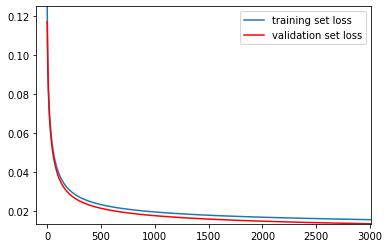

In [63]:
plt.axis([-100, epoch, min(loss_validation), max(loss_training)])
plt.plot(loss_training, label='training set loss')
plt.plot(loss_validation, label='validation set loss', color='r')
plt.legend(loc='upper right')

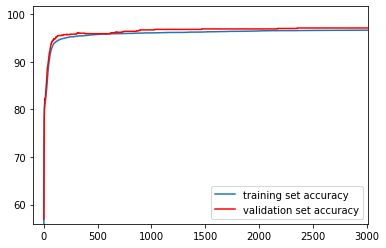

In [62]:
plt.axis([-100, epoch, min(accuracy_training), max(accuracy_training) + 5])
plt.plot(accuracy_training, label='training set accuracy')
plt.plot(accuracy_validation, label='validation set accuracy', color='r')
plt.legend(loc='lower right')

In [61]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 2356
Accuracy on training set = 96.55
Accuracy on validation set = 97.1


In [18]:
def flatten(w, b):
    toflatten = (w, [b])
    vec = np.zeros(sum(len(x) for x in toflatten))
    offset = 0
    for parameter in toflatten:
        vec[offset:offset + len(parameter)] = parameter
        offset += len(parameter)
    return vec

In [19]:
def unflatten(w, b, vec):
    tounflatten = (w, [b])
    offset = 0
    for parameter in tounflatten:
        parameter[:] = vec[offset:offset + len(parameter)]
        offset += len(parameter)
    return tounflatten

In [20]:
def fdfprime(w, b, x, y):
    epsilon  = 0.000001
    grad_w = np.zeros_like(w)
    grad_b = 0.0
    vecm     = flatten(w, b)
    vecgradm = flatten(grad_w, grad_b)
    
    for i in range(len(vecm)):
        wi           = vecm[i]

        vecm[i]     += epsilon/2       
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        r            = loss(y, f(x, w_j, b_j))
        vecm[i]      = wi
        vecm[i]     -= epsilon/2
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        l            = loss(y, f(x, w_j, b_j))
        vecgradm[i]  = (r - l)/epsilon

        vecm[i]      = wi

    return unflatten(grad_w, grad_b, vecgradm)


In [21]:
def fprime(n, x, y, w, b):
    grad_w = np.zeros(n)
    grad_b = 0.0
    
    #Forward pass
    z = np.dot(w, x) + b
    y_hat = logistic_func(z)
    
    #Backward pass
    grad_z = (y_hat - y) * logistic_der(z)
    grad_w += x * (y_hat - y) * (1 - y_hat) * y_hat 
    grad_b += (y_hat - y) * (1 - y_hat) * y_hat
    
    return (grad_w, [grad_b])

In [22]:
x = trainxs[0]
y = trainys[0]
w = np.random.random(784) / 100
grad_w, grad_b = fprime(trainxs.shape[1], x, y, w, 0.0)
fd_grad_w, fd_grad_b = fdfprime(w, 0.0, x, y)

In [23]:
fd_b = np.subtract(fd_grad_b,grad_b)
fd_w = np.subtract(fd_grad_w,grad_w)
max_fd = fd_w.max()
print(fd_b)
print(fd_w)
print("Max difference for w:", max_fd)

[5.16392484e-13]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.46700316e-11 -6.00383632e-12
 -5.27045907e-11 -7.29741545e-11 -1.54090907e-11  4.42098164e-11
 -4.58134225e-11 -2.21656304e-11  3.34801908e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.17616376e-11 -2.56785426e-11 -4.38941938e-11
 -4.93263486e-11 -4.67947903e-12 -1.14359910e-11 -4.38941938e-11
 -2.83272711e-11 -3.50837970e-11 -2.96516423e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0000